Populating the interactive namespace from numpy and matplotlib
Read present.bmp, sidelength N=100, found 7118 black tiles and 2882 white tiles
Running elf_helper 5 times on 5 different grids:


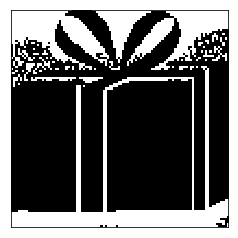

Sample 1: proportion of correct tiles is 0.90
loop 0 49628


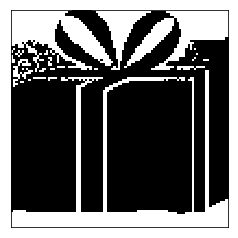

Sample 2: proportion of correct tiles is 0.90
loop 0 49357


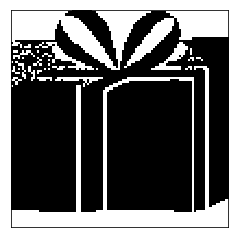

Sample 3: proportion of correct tiles is 0.90


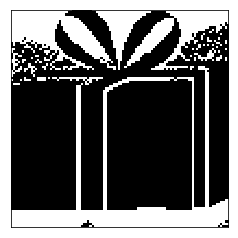

Sample 4: proportion of correct tiles is 0.89
loop 0 49639


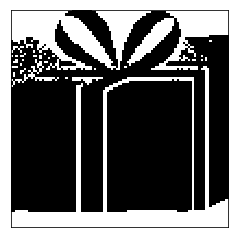

Sample 5: proportion of correct tiles is 0.90
Final (averaged) score: 0.90


In [2]:
import imageio
import traceback
import numpy
import math

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class FinishedException(Exception):
    pass
        
class Grid:
    def __init__(self):
        self.n_swap = 0
        self.n_swap_limit = 50000
        self.read_present()
        self.reset()
        
    def read_present(self):
        im = imageio.imread('present/present.bmp')
        N,M = im.shape
        if N!=M:
            reason = 'present.bmp is corrupt, non-square'
            raise Exception(reason)
        n_black, n_white = self.count_black_white(im)   
        self.present = im
        self.N = N
        self.n_white = n_white
        self.n_black = n_black
        print("Read present.bmp, sidelength N=%i, found %i black tiles and %i white tiles" % (self.N, self.n_black, self.n_white))

    def count_black_white(self, im):
        n_black = 0
        n_white = 0
        for x in range(0, 100):
            for y in range(0, 100):
                if im[y][x] == 0:
                    n_black += 1
                elif im[y][x] == 255:
                    n_white += 1
                else:
                    raise Exception('image is corrupt, non (0,255) colour found')
        return n_black, n_white
        
    def reset(self):
        perm = []
        for i in range(0,self.n_black):
            perm.append(0)
        for i in range(0,self.n_white):
            perm.append(255)        
        random.shuffle(perm)
        
        grid = self.present.copy() #easiest way
        for x in range(0, self.N):
            for y in range(0, self.N):
                grid[y][x] = perm.pop()
        self.grid = grid
        self.n_swap = 0
        
    def write(self, filename):
        imageio.imwrite(filename, self.grid)    
        
    def show(self):
        imgplot = plt.imshow(self.grid, cmap='gray')
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  
        plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)  
        plt.show()
    
    def show_present(self):
        imgplot = plt.imshow(self.present, cmap='gray')
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  
        plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)  
        plt.show()
        
    def score(self):
        n_correct = 0
        for x in range(0, self.N):
            for y in range(0, self.N):
                if self.current_colour(x,y) == self.wanted_colour(x,y):
                    n_correct += 1.0
        score = n_correct / float(self.N*self.N)
        return score
    
    def wanted_colour(self, x,y):
        return self.present[y][x] > 0
    
    def current_colour(self, x,y):
        return self.grid[y][x] > 0
        
    def is_coord(self, x, y):
        return not (x<0 or x>=self.N or y<0 or y>=self.N)       
    
    def check_finished(self):
        complete = numpy.array_equal(self.present, self.grid)
        if complete:
            b,w =self.count_black_white(self.grid)
            if b != self.n_black or w != self.n_white:
                reason = "mismatch of black/white tile counts (%s, %s, %s, %s)" % (b,n_black, w,n_white)
                raise Exception(reason)
            return True
    
    def adjacent(self, x1, y1, x2, y2):
        if x1==x2 and abs(y1-y2)==1:
            return True
        if y1==y2 and abs(x1-x2)==1:
            return True
        return False
        
    def swap(self, x1, y1, x2, y2):
        N = self.N
        if x1<0 or x1>=N or x2<0 or x2>=N or y1<0 or y1>=N or y2<0 or y2>=N:
            reason = "You have asked to swap a tile that doesn't exist: min=%i max=%i (%i, %i) (%i, %i)" % (0,N-1,x1,y1,x2,y2)
            raise Exception(reason)     
        if not self.adjacent(x1,y1, x2,y2):
            reason = 'You have asked to swap two tiles that are not adjacent: (%i, %i) (%i, %i)' % (x1,y1,x2,y2)
            raise Exception(reason)
        temp = self.grid[y1][x1]
        self.grid[y1][x1] = self.grid[y2][x2]
        self.grid[y2][x2] = temp
        self.n_swap += 1
        #if self.n_swap%5000==0:
        #    self.show()
        if self.n_swap >= self.n_swap_limit or self.check_finished():
            raise FinishedException

def elf_helper(grid):   
    # Santa will be very unhappy if you edit any code above this line
####################################################
    # INSERT YOUR ALGORITHM HERE!
    # Some built-in functions for you to use:
    #
    #  grid.swap(x1,y1, x2,y2) 
    #           swaps colours of tiles (x1,y1) and (x2,y2)
    #  
    #  grid.is_coord(x,y) 
    #           returns True if (x,y) is a tile in the grid, otherwise False
    #
    #  grid.current_colour(x,y)
    #           returns the colour (0=black, 255=white) of the tile at (x,y) in the current grid
    #
    #  grid.wanted_colour(x,y) 
    #           returns the colour (0=black, 255=white) of the tile at (x,y) in the picture present.bmp
    #
    #  grid.show() 
    #           displays your current grid
    #           [the code will automatically display your final result for each sample, and write it to 'results_sample_i.bmp']
    #
    # The coordinates x and y should be in {0,1,...,99}
    #
    # The code will run your algorithm 5 times, on 5 different starting grids
    # Once you have used 50,000 swaps, or if your grid is exactly equal to present.bmp, the code will automatically move on to the next sample 
    # You will be given a score for each run, which is the proportion of tiles you got correct

    search_max = 28
        
    def is_after(sx,sy, x,y):
        # working from TL to BR, return True if sx,sy is before x,y
        if not grid.is_coord(x,y):
            return False
        if y>sy:
            return True
        if (y==sy and x>=sx):
            return True
        return False
    
    def get_nearest_correct_after(sx, sy):
        # find nearest open tile with desired colour
        for k in range(1, search_max):
            for j in range(-k,k):
                y = sy + j
                x = sx + (k-j)
                if is_after(sx,sy, x,y) and grid.current_colour(x,y) == grid.wanted_colour(sx,sy):
                    return x,y        
                x = sx - (k-j)
                if is_after(sx,sy, x,y) and grid.current_colour(x,y) == grid.wanted_colour(sx,sy):
                    return x,y        
        return -1,-1
     
    def migrate(nx,ny, x,y):
        # move (nx,ny) to (x,y) using only open tiles
        if nx < x:
            for i in range(nx, x):
                grid.swap(i,ny, i+1,ny)
        if nx > x:
            for i in range(nx, x, -1):
                grid.swap(i,ny, i-1,ny)
        if ny < y:
            for j in range(ny, y):
                grid.swap(x,j, x,j+1)
        if ny > y:
            for j in range(ny, y, -1):
                grid.swap(x,j, x,j-1)
        assert(grid.wanted_colour(x,y)==grid.current_colour(x,y))
    
    
    # process tiles from TL to BR
    n_loop = 0
    while (True):  
        for cy in range(0,100):
            for cx in range(0,100):
                if grid.current_colour(cx,cy) != grid.wanted_colour(cx,cy):
                    nx,ny = get_nearest_correct_after(cx,cy)
                    if nx>-1:
                        migrate(nx,ny, cx,cy)
        
        print("loop", n_loop, grid.n_swap)
        n_loop += 1
    
###################################################
    # Santa will be very unhappy if you edit any code below this line

def __main__():
    random.seed(1)

    n_wanted_sample = 5
    score = 0.0
    grid = Grid()
    print("Running elf_helper %i times on %i different grids:" % (n_wanted_sample, n_wanted_sample))
    
    for i in range(1, 1+n_wanted_sample):
        grid.reset()
        try:
            elf_helper(grid)
        except FinishedException:
            this_score = grid.score()
            score += this_score
            grid.show()
            print("Sample %i: proportion of correct tiles is %.2f" % (i, this_score))
            grid.write("result_sample_%d.bmp" % i)
            continue
        except Exception as e:
            print()
            traceback.print_exc()
            print()
            print("Santa would like you to fix the error and try again")
            return
    score /= float(n_wanted_sample) 
    print("Final (averaged) score: %.2f" % score)    

__main__()  